# Need to complete example using sklearn.

In [22]:
%matplotlib inline
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import math, scipy, numpy as np
from scipy import linalg

import seaborn as sns
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
sns.set(style="darkgrid")


#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
# Check the version of the packages

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('Numpy version ' + np.__version__)
print('Seaborn version ' + sns.__version__)

Python version 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 09:55:02) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.23.4
Matplotlib version 2.2.3
Numpy version 1.13.1
Seaborn version 0.9.0


In [3]:
url_data = "https://raw.githubusercontent.com/sb0709/bootcamp_KSU/master/Data/data.csv"
data = pd.read_csv(url_data,sep=',' ) # for specify the index we use here the colums "0" when reading the data: , index_col=0

In [4]:
data.shape

(1000, 11)

In [5]:
print(list(data.columns))

['Unnamed: 0', 'MATCHKEY', 'RBAL', 'TRADES', 'AGE', 'AGE_groups', 'DELQID', 'CRELIM', 'goodbad', 'BRNEW', 'BRAGE']


In [6]:
data.head()

,Unnamed: 0,MATCHKEY,RBAL,TRADES,AGE,AGE_groups,DELQID,CRELIM,goodbad,BRNEW,BRAGE
0,0,16345246,1492,4,39,AG_30_50,1,750,0,5,20
1,1,13728016,0,3,71,AG_70_UP,0,3250,0,19,19
2,2,14716776,854,9,30,AG_0_30,4,500,1,0,46
3,3,14568809,408,13,28,AG_0_30,1,3000,0,2,33
4,4,13513749,4965,41,51,AG_50_70,0,500,0,3,68


In [7]:
# drop the order number column

data = data.drop(['Unnamed: 0'], axis=1)

In [8]:
data.head()

,MATCHKEY,RBAL,TRADES,AGE,AGE_groups,DELQID,CRELIM,goodbad,BRNEW,BRAGE
0,16345246,1492,4,39,AG_30_50,1,750,0,5,20
1,13728016,0,3,71,AG_70_UP,0,3250,0,19,19
2,14716776,854,9,30,AG_0_30,4,500,1,0,46
3,14568809,408,13,28,AG_0_30,1,3000,0,2,33
4,13513749,4965,41,51,AG_50_70,0,500,0,3,68


In [9]:
# EDA
# Lets make the 'MATCHKEY' as index for our analysis
data.set_index('MATCHKEY', inplace=True) # inplace is to do replace int he currect dataframe, we can also assign the data to a new dataframe with the transofmations.


data['goodbad'].value_counts()

0    813
1    187
Name: goodbad, dtype: int64

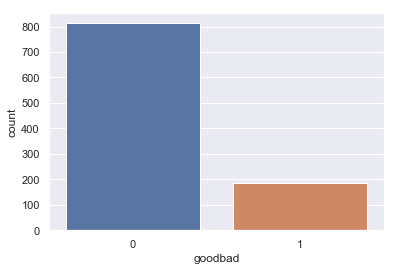

In [10]:
# plot the 'goodbad' column
# https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.set(style="darkgrid")
ax = sns.countplot(x="goodbad", data=data)


In [11]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

# Here we move on to take a look of the mean/average of the data accros the 2 classes for the 'goodbad'

# Note: we can calculate the average accros other categorical variable




data.groupby('goodbad').mean()

,RBAL,TRADES,AGE,DELQID,CRELIM,BRNEW,BRAGE
goodbad,,,,,,,
0,7225.330873,19.060271,48.107011,0.359164,2326.392374,16.809348,109.514145
1,8174.598930,19.716578,45.577540,5.818182,1734.187166,16.540107,98.593583


In [12]:
# the mean/average of the data accros the classes for the 'AGE_groups'

data.groupby('AGE_groups').mean()

,RBAL,TRADES,AGE,DELQID,CRELIM,goodbad,BRNEW,BRAGE
AGE_groups,,,,,,,,
AG_0_30,4325.703704,13.771605,25.481481,1.506173,1967.290123,0.191358,15.654321,57.259259
AG_30_50,6801.691244,19.165899,41.520737,1.557604,2242.470046,0.221198,17.520737,101.910138
AG_50_70,9584.553797,21.803797,59.161392,1.208861,2329.234177,0.161392,15.724684,132.003165
AG_70_UP,8198.034091,19.818182,77.170455,0.886364,2132.715909,0.102273,18.750000,139.250000


# Visualisation of the data:

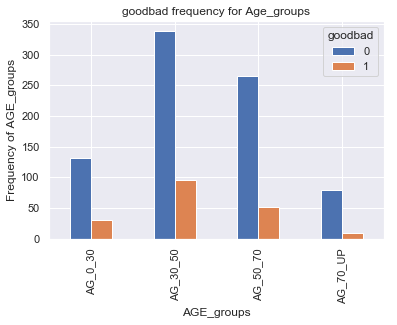

In [13]:
pd.crosstab(data.AGE_groups,data.goodbad).plot(kind='bar')
plt.title('goodbad frequency for Age_groups')
plt.xlabel('AGE_groups')
plt.ylabel('Frequency of AGE_groups')
plt.show()

# Modeling

In [14]:
# for modeling will use Feature ranking with recursive feature elimination. 
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

# works as follow: Construct repeatedly a model and takes features each by one and test with the remaining and set aside till all the features 
# are used and selects the best performing model by using the the minimum for the best performing model.

# Example here:

from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)
print("Print The mask of selected features: ", selector.support_)
print()

print("Print The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.", selector.ranking_)

Print The mask of selected features:  [ True  True  True  True  True False False False False False]

Print The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1. [1 1 1 1 1 6 4 3 2 5]


In [15]:
# data split in X and Y

# for drop the index: df.reset_index(drop = True, inplace = True)

# df = data.reset_index(drop = True, inplace = True)
#print(df.head())

X = data.drop(['goodbad','AGE_groups'], axis=1)
print('Matrix Shape of X is:', X.shape, X.head())

y = data['goodbad']
print('Target variable shape "y" is:', y.shape, y.head())




Matrix Shape of X is: (1000, 7)           RBAL  TRADES  AGE  DELQID  CRELIM  BRNEW  BRAGE
MATCHKEY                                                 
16345246  1492       4   39       1     750      5     20
13728016     0       3   71       0    3250     19     19
14716776   854       9   30       4     500      0     46
14568809   408      13   28       1    3000      2     33
13513749  4965      41   51       0     500      3     68
Target variable shape "y" is: (1000,) MATCHKEY
16345246    0
13728016    0
14716776    1
14568809    0
13513749    0
Name: goodbad, dtype: int64


In [16]:
# X["AGE_groups"] = X["AGE_groups"].astype('category')

#check the column names:

X.columns.values

array(['RBAL', 'TRADES', 'AGE', 'DELQID', 'CRELIM', 'BRNEW', 'BRAGE'], dtype=object)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# for all 7 variables

logreg = LogisticRegression()

selector = RFE(logreg, 7, step=1) #7 is n_features_to_select, default is none and is is none than is used half of the features.
selector = selector.fit(X, y)

print("Print The mask of selected features: ", selector.support_)
print()

print("Print The feature ranking:", selector.ranking_)


Print The mask of selected features:  [ True  True  True  True  True  True  True]

Print The feature ranking: [1 1 1 1 1 1 1]


In [18]:
# if we want to have 5 variables selected finally than we have the following: 

selector = RFE(logreg, 5, step=1) #5 is n_features_to_select, default is none and is is none than is used half of the features.
selector = selector.fit(X, y)

print("Print The mask of selected features: ", selector.support_)
print()

print("Print The feature ranking:", selector.ranking_)

Print The mask of selected features:  [False  True  True  True False  True  True]

Print The feature ranking: [3 1 1 1 2 1 1]


# Implementation of the logistic model  using statsmodel package:


`statsmodels` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. 
The results are tested against existing statistical packages to ensure that they are correct. 
The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.


https://www.statsmodels.org/stable/index.html

In [24]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X) # create the model

result=logit_model.fit() # fit the model

print(result.summary()) 

Optimization terminated successfully.
         Current function value: 0.045915
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                goodbad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      993
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:                  0.9047
Time:                        02:25:55   Log-Likelihood:                -45.915
converged:                       True   LL-Null:                       -481.84
                                        LLR p-value:                4.553e-185
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RBAL           0.0002    4.3e-05      4.155      0.000    9.45e-05       0.000
TRADES        -0.1495      0

In [25]:
# Interpretation/Summary : p-value for most of our selected variables are significant except BRAGE and BRNEW.

# Now example using sklearn library

# write the data to the disk macOS location github
###### data.to_csv('/Users/sb0709/Documents/GitHub/bootcamp_KSU/Data/data_reg.csv', sep = ',')

# pushing all datasets to github for reading csv for this tutorials
##### data.to_csv('/home/sb0709/github_repos/bootcamp_KSU/Data/data_reg.csv', sep = ',')

In [26]:
# modified original http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# import some data to play with
X = data.drop(['goodbad','AGE_groups'], axis=1)
print('Matrix Shape of X is:', X.shape, X.head())

y = data['goodbad'] # target variable
print('Target variable shape "y" is:', y.shape, y.head())

#split/create the dataset in train and test 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# we create an instance of Neighbours Classifier and fit the data.
logreg = LogisticRegression() #logisticRegression
print(logreg.fit(X_train, y_train))

# Clustering

knn = KNeighborsClassifier() #clustering
print(knn.fit(X_train, y_train))

Matrix Shape of X is: (1000, 7)           RBAL  TRADES  AGE  DELQID  CRELIM  BRNEW  BRAGE
MATCHKEY                                                 
16345246  1492       4   39       1     750      5     20
13728016     0       3   71       0    3250     19     19
14716776   854       9   30       4     500      0     46
14568809   408      13   28       1    3000      2     33
13513749  4965      41   51       0     500      3     68
Target variable shape "y" is: (1000,) MATCHKEY
16345246    0
13728016    0
14716776    1
14568809    0
13513749    0
Name: goodbad, dtype: int64
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights

In [27]:
print('LogisticRegression score: %f'
      % logreg.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.973333


In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression classifier on test dataset:', logreg.score(X_test, y_test))

Accuracy of Logistic Regression classifier on test dataset: 0.973333333333


In [29]:
print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.776667


# Confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[236   2]
 [  6  56]]


### Interpretation: correct predictions are: 236 + 2, incorect predictions are:  7 + 55

# Build a text report showing the main classification metrics



``` python
klearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
```

In [31]:
# source: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       238
          1       0.97      0.90      0.93        62

avg / total       0.97      0.97      0.97       300



# Q&A